# Flights Data Exploration
## by Thays Martinez

## Preliminary Wrangling

This document explores a sample of US flights which were registered between the years of 2015 and 2019. The dataset contains approximately 500,000 flights, and 31 variables.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

# Import custom module to plot chart annotations
from chart_annotations import chart_props, chart_means

%matplotlib inline

In [2]:
# Load dataset into a pandas DataFrame
df_flights = pd.read_csv('flights.csv', low_memory=False)

In [3]:
# High-level overview of the data shape and composition
pd.set_option('display.max_columns', 35)
df_flights.head()

,date,year,month,weekday,dep_airport,dep_city,dep_state,dest_airport,dest_city,dest_state,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,fl_type,canc_desc,crs_elapsed_time,elapsed_time,air_time,distance,Carrier,Weather,NAS,Security,Late Aircraft
0,2019-01-30,2019,1,3,FNT,Flint,MI,ATL,Atlanta,GA,06:00:00,05:54:00,-6.0,38.0,06:32:00,08:14:00,4.0,08:20:00,08:18:00,-2.0,On-time,NaN,140,144.0,102.0,645,NaN,NaN,NaN,NaN,NaN
1,2019-10-18,2019,10,5,CMH,Columbus,OH,MIA,Miami,FL,06:57:00,07:13:00,16.0,23.0,07:36:00,09:48:00,4.0,09:41:00,09:52:00,11.0,On-time,NaN,164,159.0,132.0,990,NaN,NaN,NaN,NaN,NaN
2,2016-11-18,2016,11,5,MIA,Miami,FL,LAX,Los Angeles,CA,07:30:00,07:31:00,1.0,17.0,07:48:00,09:48:00,10.0,10:16:00,09:58:00,-18.0,On-time,NaN,346,327.0,300.0,2342,NaN,NaN,NaN,NaN,NaN
3,2019-05-13,2019,5,1,LRD,Laredo,TX,DFW,Dallas/Fort Worth,TX,16:14:00,16:16:00,2.0,15.0,16:31:00,17:30:00,8.0,17:45:00,17:38:00,-7.0,On-time,NaN,91,82.0,59.0,396,NaN,NaN,NaN,NaN,NaN
4,2017-04-19,2017,4,3,LAX,Los Angeles,CA,MSY,New Orleans,LA,09:25:00,09:40:00,15.0,16.0,09:56:00,15:05:00,2.0,15:07:00,15:07:00,0.0,On-time,NaN,222,207.0,189.0,1670,NaN,NaN,NaN,NaN,NaN


In [4]:
df_flights.describe()

,year,month,weekday,dep_delay,taxi_out,taxi_in,arr_delay,crs_elapsed_time,elapsed_time,air_time,distance,Carrier,Weather,NAS,Security,Late Aircraft
count,498818.000000,498818.000000,498818.000000,491127.000000,491127.000000,491127.000000,491127.000000,498818.000000,491127.000000,491127.000000,498818.000000,91316.000000,91316.000000,91316.000000,91316.000000,91316.000000
mean,2017.147226,6.556540,3.936853,9.792080,16.812892,7.558230,4.624533,142.442151,138.110051,113.738929,821.926867,20.070973,3.196329,15.316462,0.084980,25.544998
std,1.432033,3.401067,1.991291,43.743418,9.452428,5.945651,45.972517,79.705219,74.227750,72.146601,606.833104,59.471621,27.165795,34.337149,2.286093,50.144153
min,2015.000000,1.000000,1.000000,-48.000000,1.000000,0.000000,-94.000000,-1400.000000,15.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,2.000000,-5.000000,11.000000,4.000000,-14.000000,88.000000,83.000000,61.000000,372.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,7.000000,4.000000,-2.000000,14.000000,6.000000,-6.000000,124.000000,119.000000,95.000000,651.000000,1.000000,0.000000,2.000000,0.000000,3.000000
75%,2018.000000,9.000000,6.000000,6.000000,20.000000,9.000000,7.000000,175.000000,170.000000,144.000000,1062.000000,18.000000,0.000000,19.000000,0.000000,31.000000
max,2019.000000,12.000000,7.000000,1649.000000,175.000000,324.000000,1636.000000,718.000000,717.000000,684.000000,5095.000000,1636.000000,1443.000000,1457.000000,244.000000,1349.000000


In [5]:
print(df_flights.shape)
print(df_flights.info())

(498818, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498818 entries, 0 to 498817
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              498818 non-null  object 
 1   year              498818 non-null  int64  
 2   month             498818 non-null  int64  
 3   weekday           498818 non-null  int64  
 4   dep_airport       498818 non-null  object 
 5   dep_city          498818 non-null  object 
 6   dep_state         498818 non-null  object 
 7   dest_airport      498818 non-null  object 
 8   dest_city         498818 non-null  object 
 9   dest_state        498818 non-null  object 
 10  crs_dep_time      498818 non-null  object 
 11  dep_time          491127 non-null  object 
 12  dep_delay         491127 non-null  float64
 13  taxi_out          491127 non-null  float64
 14  wheels_off        491127 non-null  object 
 15  wheels_on         491127 non-null  object 
 16  taxi_in

Observing the raw data, a few transformations still need to be done to perform a better analysis.

For simplicity, scheduled departure and arrival times can be broken down into the hour component.

In [6]:
# Breakdown datetime objects and convert to int
df_flights['crs_dep_hour'] = df_flights.crs_dep_time.str.slice(0, 2)
df_flights['crs_arr_hour'] = df_flights.crs_arr_time.str.slice(0, 2)

Some of the variables in this dataset are in the wrong data type, therefore needs to be converted.

In [7]:
# Convert flight date to datetime data type
df_flights['date'] = pd.to_datetime(df_flights['date'])

# Convert to string data type
variables_str = ['year', 'month', 'weekday']
convert_str = lambda x: x.astype(str) if x.name in variables_str else x
df_flights = df_flights.apply(convert_str)

# Pad zero to month string
df_flights['month'] = df_flights.month.str.zfill(2)

# Convert to category data type
variables_cat = ['fl_type', 'canc_desc', 'diverted']
convert_cat = lambda x: x.astype('category') if x.name in variables_cat else x
df_flights = df_flights.apply(convert_cat)

In [8]:
# Reorder columns
columns = ['date', 'year', 'month', 'weekday', 'dep_airport', 'dep_city', 'dep_state',
           'dest_airport', 'dest_city', 'dest_state', 'crs_dep_hour', 'crs_dep_time', 
           'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 
           'crs_arr_hour', 'crs_arr_time', 'arr_time', 'arr_delay', 'fl_type', 
           'canc_desc', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance', 
           'Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']

df_flights = df_flights[columns]

### What is the structure of your dataset?

This sample dataset contains 498,818 flights and, after a few transformations, is comprised of 33 features: date, year, month, weekday, dep_airport, dep_city, dep_state, dest_airport, dest_city, dest_state, crs_dep_hour, crs_dep_time, dep_time, dep_delay, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_hour, crs_arr_time, arr_time, arr_delay, fl_type, canc_desc, crs_elapsed_time, elapsed_time, air_time, distance, Carrier, Weather, NAS, Security, Late Aircraft.


The columns Carrier, Weather, NAS, Security and Late Aircraft indicate the delay duration in minutes for flights which were not diverted and have been finalized. These features have the following definitions:

- **Carrier:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- **Weather:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
- **NAS:** Stands for National Aviation System. Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- **Security:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- **Late Aircraft:** a previous flight with same aircraft arrived late, causing the present flight to depart late.

Most variables are either numeric or object types. The variable **cancellation_desc** is categorical and, apart from Late Aircraft (which only occurs if a flight has been finalized), its values has the same classification as above.

### What is/are the main feature(s) of interest in your dataset?

The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time. I'm interested in figuring out what factors have the most influence in flight delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Although delay cause gives a good indication of the reason a flight is delayed, I am also expecting that the flight date and time, origin airport, scheduled departure time and arrival delay will have effects on flight's delay duration. I also think that other features will have effects on delay's duration, though to a much smaller degree.

## Univariate Exploration

I'll start by looking at the distribution of flight types. 

In [9]:
# Set default plot parameters
base_color = sb.color_palette()[0]

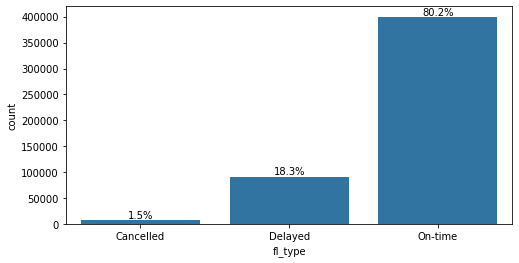

In [10]:
plt.figure(figsize=[8, 4])
sb.countplot(data=df_flights, x='fl_type', color=base_color)
chart_props(df_flights, 'fl_type');

Flight types are divided between Cancelled, Delayed (if delay duration is equal or above 15 minutes) and On-time. Data suggests that 80.2% of flights between 2015 and 2019 are considered to arrive on time. Delays account for 18.3%, and 1.5% of flights were cancelled.

Now, let's look at the flight demand per year, month and hour.

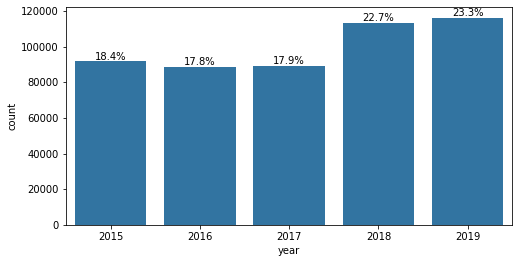

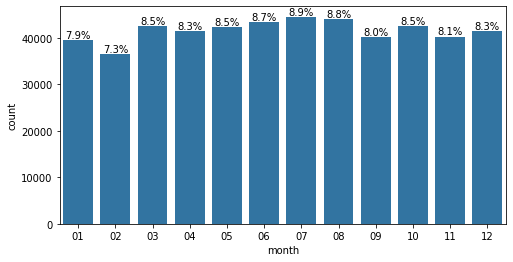

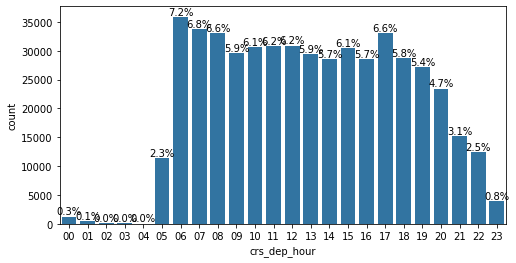

In [11]:
variables = ['year', 'month', 'crs_dep_hour']

for variable in variables:
    plt.figure(figsize=[8, 4])
    sb.countplot(data=df_flights, x=variable, color=base_color)
    chart_props(df_flights, variable);

Number of flights remained stable during the first 3 years. In 2018, however, flights had an increase in demand of nearly 5% when comparing to the previous year. 2019 registered an even higher demand, with 23.3% against 22.7% in 2018.

Flight demand seems well distributed between months. February has the lowest demand, whereas June, July and August record the highest demand, suggesting that summer holidays may be an influence factor for this trend.

Data shows that majority of flights are registered between 6am and 10pm, perhaps due to airports operation times. It also suggests that the preferred hours to fly are early in the morning (between 6am and 9am) and at 6pm in the evening, from when number of flights starts to ramp down until 11pm. 

From and which states most flights depart?

Total number of states: 54


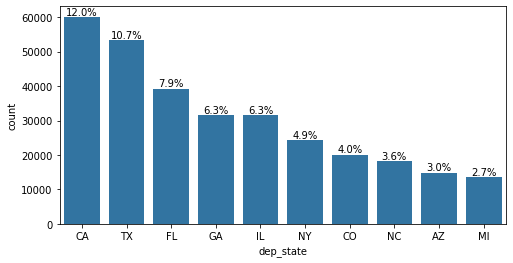

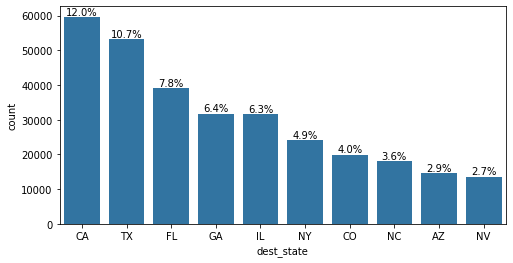

In [12]:
variables = ['dep_state', 'dest_state']

for variable in variables:
    order_var = df_flights[variable].value_counts().index[:10] # Limit to 10 states
    plt.figure(figsize=[8, 4])
    sb.countplot(data=df_flights, x=variable, color=base_color, order=order_var)
    chart_props(df_flights, variable);
    
nb_states = len(df_flights.dest_state.value_counts().index)
print('Total number of states:', nb_states)

10 of the 54 states account for over 60% of flight demand, with California (CA) and Texas (TX) leading the ranking with over 10% of flights each. These states are home to airports with the highest amount of passenger traffic in US.

Interestingly, except for Michigan (MI) and State of Nevada (NV) the departure state matches the arrival state in the ranking order. Proportions are also almost identical. 

Now let's explore the distribution of flights per departure and arrival delay. 

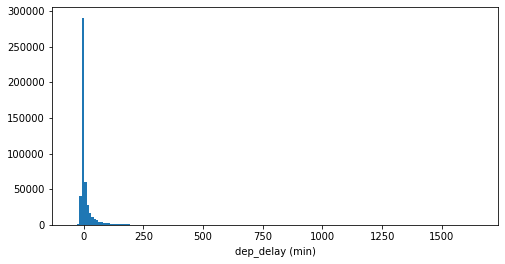

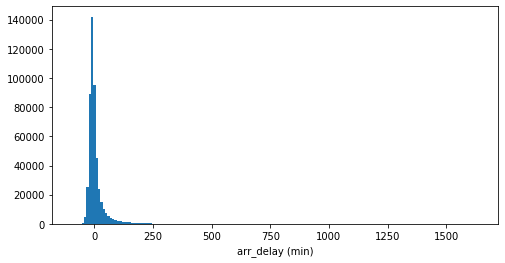

In [13]:
# Start with a standard-scaled plot
variables = ['dep_delay', 'arr_delay']

for variable in variables:
    max_taxi = df_flights[variable].max()
    min_taxi = df_flights[variable].min()
    bin_edges = np.arange(min_taxi, max_taxi+10, 10)
    plt.figure(figsize=[8, 4])
    plt.hist(data=df_flights, x=variable, bins=bin_edges)
    plt.xlabel('{} (min)'.format(variable));

On the plots above, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. The right limits of both plots also suggest that there are some points that take unusually big values. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [14]:
# Select high outliers, using criteria eyeballed from the plots
high_outliers = df_flights['arr_delay'] > 240 # Delays above 4 hours

nb_outliers = high_outliers.sum()
pct_outliers = (nb_outliers/len(df_flights)*100).round(3)

print('{} total - {}% outliers'.format(nb_outliers, pct_outliers))
print('\nHigh outliers - Descriptive Statistics')
print(df_flights.loc[high_outliers, 'arr_delay'].describe())
print('\n')
print(df_flights.loc[high_outliers, ['crs_dep_time', 'dep_time', 'crs_arr_time', 'arr_time']]
                .sample(30).reset_index(drop=True))

2515 total - 0.504% outliers

High outliers - Descriptive Statistics
count    2515.000000
mean      400.135586
std       219.198042
min       241.000000
25%       267.000000
50%       312.000000
75%       425.000000
max      1636.000000
Name: arr_delay, dtype: float64


   crs_dep_time  dep_time crs_arr_time  arr_time
0      12:00:00  18:24:00     17:04:00  23:24:00
1      10:50:00  15:50:00     11:32:00  16:32:00
2      22:31:00  12:33:00     23:39:00  13:50:00
3      22:35:00  13:25:00     23:27:00  14:30:00
4      08:15:00  13:14:00     11:34:00  16:34:00
5      17:10:00  21:40:00     19:31:00  23:56:00
6      08:30:00  13:42:00     10:13:00  15:20:00
7      17:05:00  21:50:00     19:36:00  00:09:00
8      17:43:00  22:45:00     18:40:00  23:30:00
9      13:45:00  18:15:00     15:04:00  19:38:00
10     12:15:00  16:59:00     14:18:00  19:11:00
11     15:25:00  21:15:00     17:30:00  23:21:00
12     13:00:00  17:13:00     15:42:00  19:58:00
13     11:30:00  23:21:00     13:07:00  00:

Arrival delays are calculated by the difference between actual and scheduled arrival times. There are 2515 flights with arrival delay above 4 hours, representing only 0.5% of the flights analyzed. The descriptive statistics from high outliers show that 75% of these have delays betwen 4 and 7 hours. 

The statistics also show that some of the high outliers have delays over 24 hours (max 1636 min). Since the arrival date feature are missing from the dataset, I cannot calculate the real arrival times, therefore I will treat outliers separately. 

For now I will limit the x-axis to display the bulk of the distribution.

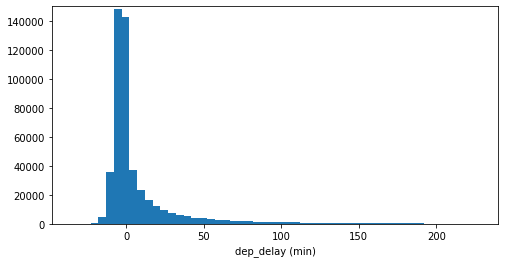

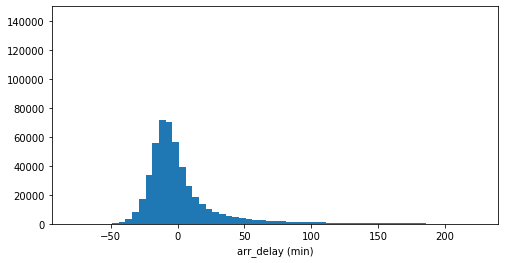

In [15]:
# There is a long tail in the distribution, so let's limit 
# the x-axis to 250 min
variables = ['dep_delay', 'arr_delay']

for variable in variables:
    max_delay = df_flights[variable].max()
    min_delay = df_flights[variable].min()
    bin_edges = np.arange(min_delay, max_delay+5, 5)
    plt.figure(figsize=[8, 4])
    plt.hist(data=df_flights, x=variable, bins=bin_edges)
    plt.xlim(min_delay, 240)
    plt.ylim(0, 150000)
    plt.xlabel('{} (min)'.format(variable));

Departure and arrival delay variables still have a long-tailed distribution, with a lot of flights actually departing and arriving ahead or on time, and fewer flights on the high delay end.

Interestingly, there are two larger spikes just before the 0 min delay mark in the departure delay graph, showing that to a great degree, actual departure times follow the scheduled time. On the other hand, distribution in the arrival delay duration are more spread out to both sides of the 0 min delay mark, with a less accentuated peak. 

Both distributions suggests that (1) to some degree actual departure times can affect actual arrival times both positively and negatively, and in the occurrence of the latter (2) actual departure times are compensated during taxiing and / or flight time.

Now to the next variables of interest: taxi-out and taxi-in.

Max taxi duration during taxi_out: 175.0
Max taxi duration during taxi_in: 324.0


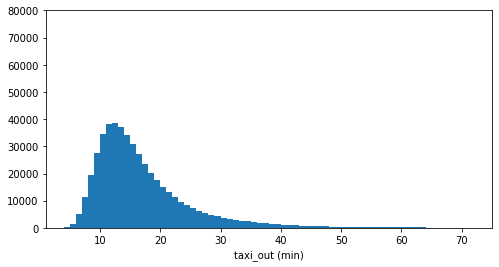

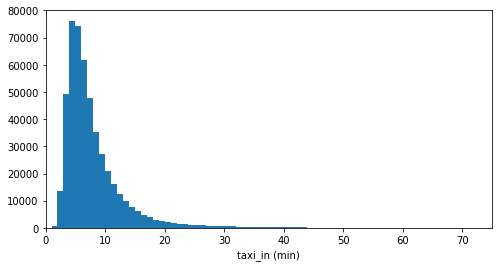

In [16]:
# Plot aircraft taxiing duration
variables = ['taxi_out', 'taxi_in']

for variable in variables:
    max_taxi = df_flights[variable].max()
    min_taxi = df_flights[variable].min()
    bin_edges = np.arange(min_taxi, max_taxi+1, 1)
    plt.figure(figsize=[8, 4])
    plt.hist(data=df_flights, x=variable, bins=bin_edges)
    plt.xlim(min_taxi, 75)
    plt.ylim(0, 80000)
    plt.xlabel('{} (min)'.format(variable));
    print('Max taxi duration during {}: {}'.format(variable, max_taxi))

There is also a long-tail distribution with some points taking unusually high values. Also here I am applying limits to the x-axis to focus on the bulk of the distribution.

Taxi-out time is defined as the time between the actual pushback and wheels-off. Aircraft taxiing duration on departure has a wider distribution, with most flights taking between 10 to 20 minutes to taxi. 

There is a narrower distribution in taxiing times at arrival with most flights taking between 0 to 10 minutes, which suggests that airport operators try to compensate long taxi-out times and/or delays  by adjusting schedule, gates assignment and/or controlling taxi speed at arrival.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Departure delay, arrival delay, taxi-out and taxi-in features took in a large range on values, so I limited the x-axis limits accordingly to focus on the bulk of distributions.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The long-tail distribution on the arrival delay feature demonstrate a number of outliers in the dataset. I used a visual assessment of the chart to define a threshold for outliers, applied descriptive statistics to understand the frequency and found that outliers take only 0.5% of flights analyzed. 

Features like arrival date and actual arrival time would enable me to calculate the arrival delay and validate if these are real outliers or incorrect input data. Since these are missing from the dataset, there is no way validate, therefore I decided to keep the data and analyze/transform at a later stage, when diving into the delayed flights data.

## Bivariate Exploration

In this part of the exploration, I will concentrate the analysis on Delayed flights, but first let's start with the distribution of flight types across years and months.

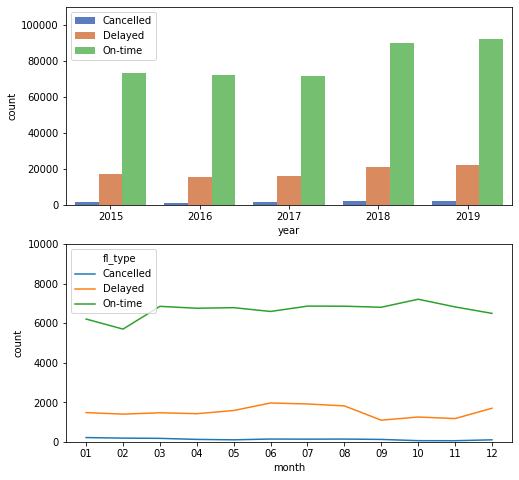

In [17]:
df_types = df_flights.groupby(['year', 'month', 'fl_type']).fl_type.count()
df_types = df_types.reset_index(name='count')

plt.figure(figsize=[8, 8])

ax = plt.subplot(2, 1, 1)
sb.countplot(data=df_flights, x='year', hue='fl_type', palette='muted');
plt.ylim(0, 110000) # Set y-axis limit to fit legend 
ax.legend(loc=2);

ax = plt.subplot(2, 1, 2)
sb.lineplot(data = df_types, x = 'month', y='count', hue='fl_type', ci=None, legend='full')
plt.ylim(0, 10000)
ax.legend(loc=2); # Set y-axis limit to fit legend 

The number of On-time, Delayed and Cancelled flights increased at about the same rate throughout the years. Zooming into month's data, cancelled flights didn't suffer significant variations. On the other hand, there is a noticeable increase in delayed flights for the months of June, July and August, and another peak for December. The peak for On-time flights occurred for the month of October, whereas the lowest level seems to have been reached in February.

Now focusing on the delayed flights, let's look into the pairwise correlations between numerical features in the flight delays data.

In [18]:
# DataFrame containing delayed flights
df_delays = df_flights.query('fl_type == "Delayed"').reset_index(drop=True)

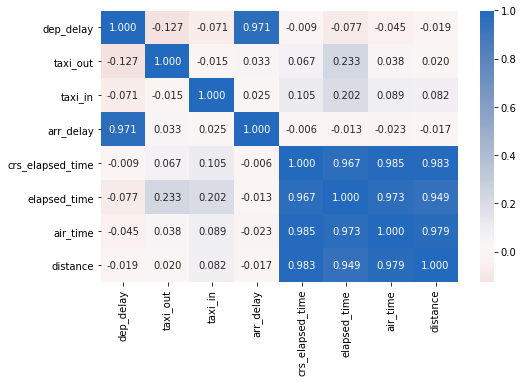

In [19]:
numeric_vars = ['dep_delay', 'taxi_out', 'taxi_in', 'arr_delay', 'crs_elapsed_time', 
                'elapsed_time', 'air_time', 'distance']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_delays[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

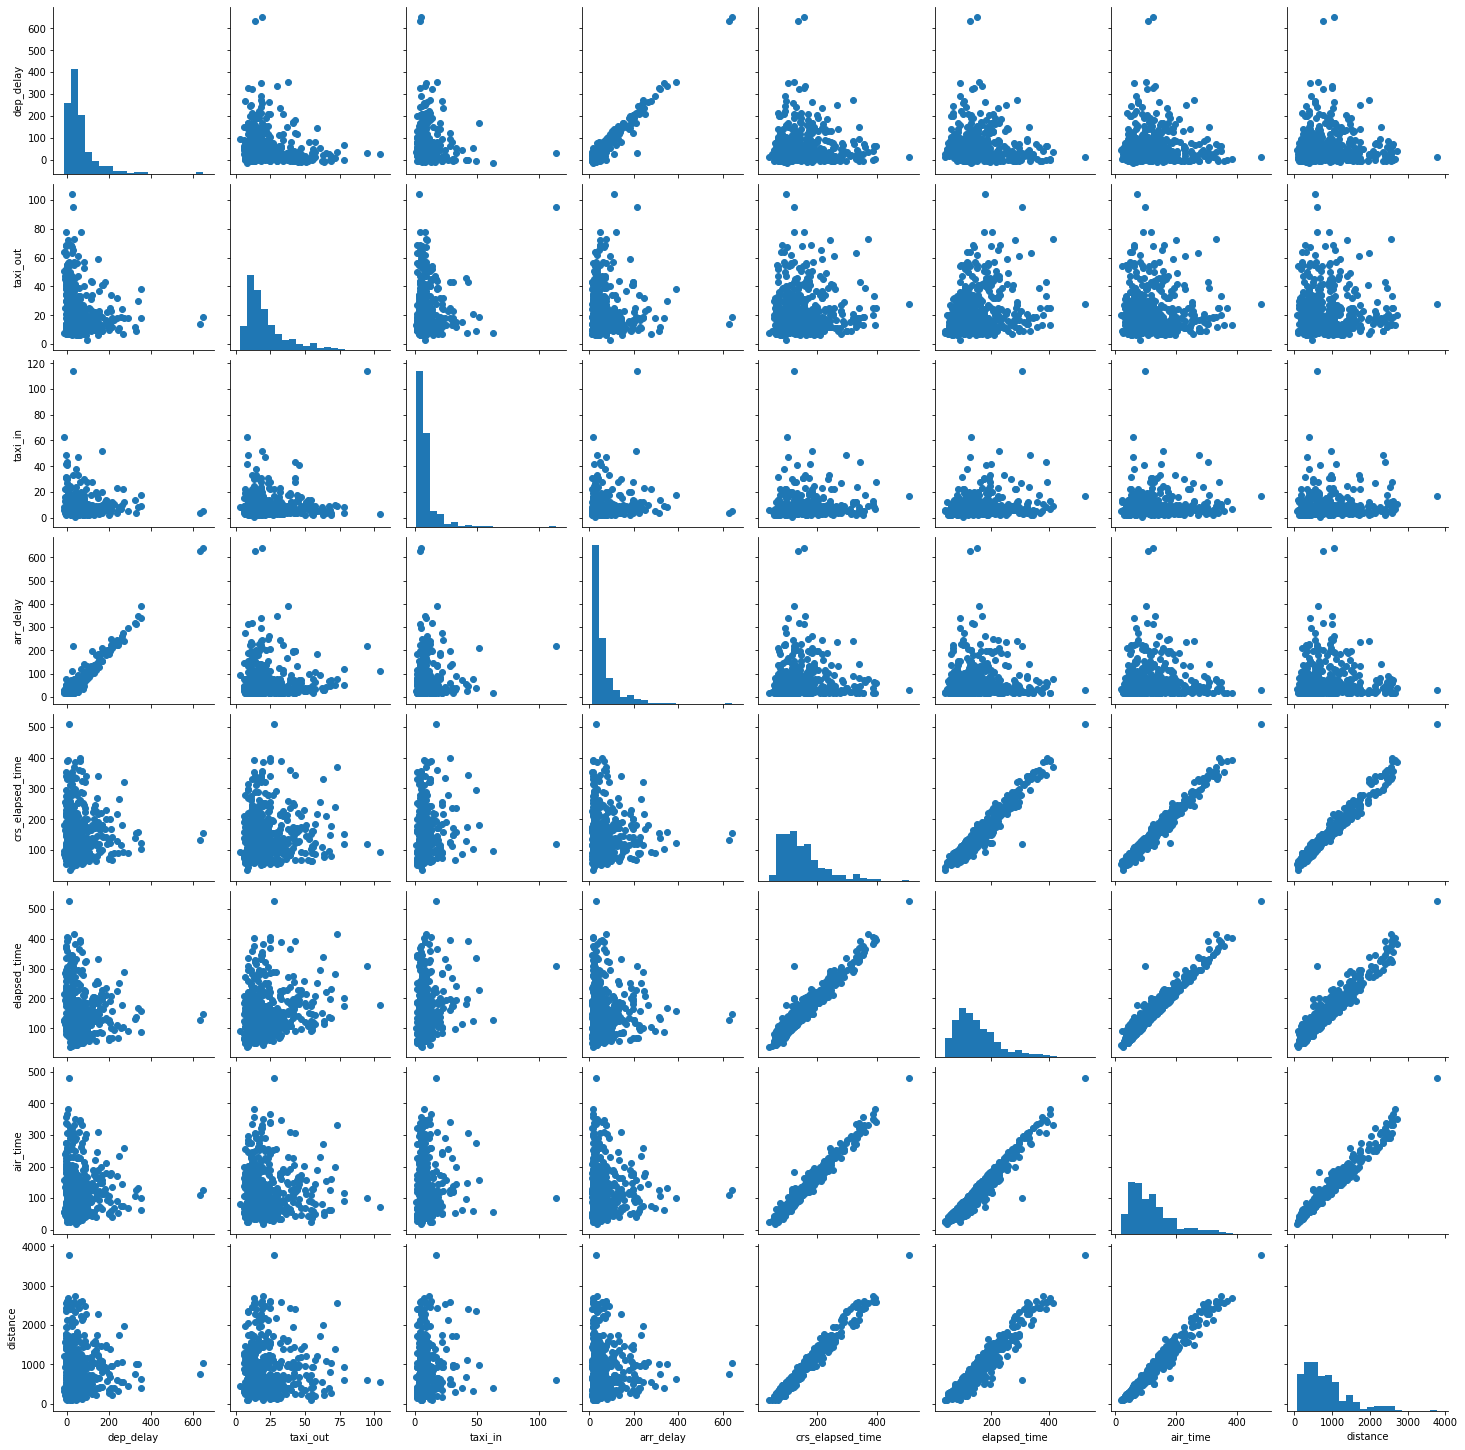

In [20]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
np.random.seed(42)
samples = np.random.choice(df_delays.shape[0], 500, replace=False)
delays_samp = df_delays.loc[samples, :]
g = sb.PairGrid(data = delays_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

There is no strong correlations between variables, except for those which are already expected: arrival delays are highly affected by delays during departure. Furthermore, the longer the distance, also longer is the flight and the elapsed time. 

Arrival and departure delays seem to occur mostly on shorter distance flights.

As discussed in the previous section, there are only a few instances where arrival delays take several hours. To have a better understanding of the data distribution, I will use data binning to convert arrival delays into 4 categories: Short Delay, Medium Delay, Long Delay and Severe Delay.

In [21]:
bins = [15, 61, 151, 331, max(df_delays.arr_delay)]
cat_names = ['Short (15 - 60 min.)', 'Medium (61 - 150 min.)', 
             'Long (151 - 330 min.)', 'Severe (above 330 min.)']

df_delays['delay_severity'] = pd.cut(df_delays['arr_delay'], bins, labels=cat_names, include_lowest=True)

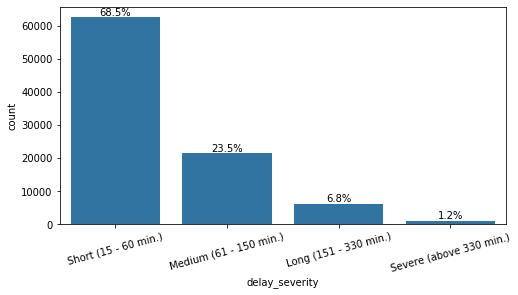

In [22]:
plt.figure(figsize=[8, 4])
sb.countplot(data=df_delays, x='delay_severity', color=base_color)
chart_props(df_delays, 'delay_severity')
plt.xticks(rotation=15);

Short-delay flights are almost 3 times more frequent than medium-delay's, and together both represent 92% of the delayed flights in this dataset.

Next, let's take a look at the distribution of delay types across the 5-year period.

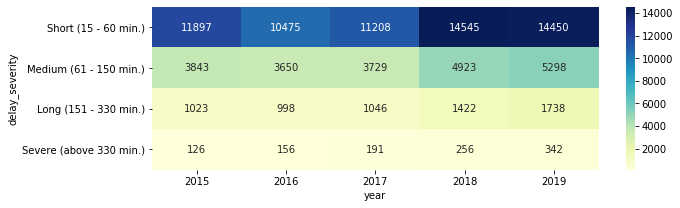

In [23]:
ct_counts = df_delays.groupby(['year', 'delay_severity']).size()
ct_counts = ct_counts.reset_index(name='count').pivot(index='delay_severity', columns='year', values='count')

plt.figure(figsize=[10, 3])
sb.heatmap(ct_counts, annot=True, fmt='d', cmap='YlGnBu');

As described in the previous section, number of flights increases significantly in 2018 and 2019. The heatmap also  indicates the rise in in the number of flights in each delay severity category for both years. 

Interestingly, the severe-delayed flight category is the only which increases at a steady rate in all years. 

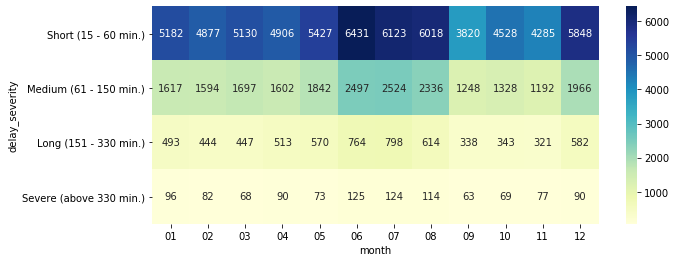

In [24]:
ct_counts = df_delays.groupby(['month', 'delay_severity']).size()
ct_counts = ct_counts.reset_index(name='count').pivot(index='delay_severity', columns='month', values='count')
plt.figure(figsize=(10, 4))
sb.heatmap(ct_counts, cmap='YlGnBu', annot=True, fmt='d');

A trend observed previously repeats when looking into the relationship between delay severity and months. June, July, August and December concentrate the majority of flight delays in each category, with a strong indication that holidays season is when flights are more prone to suffer all levels of delays. 

Overall, the number of delayed flights across all delay levels are lower in the months of September, October and November.

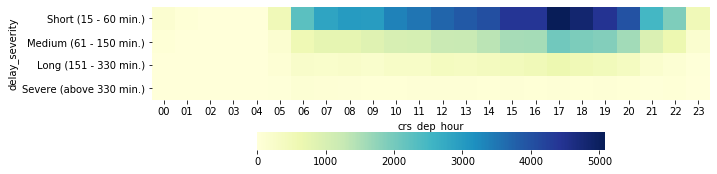

In [25]:
ct_counts = df_delays.groupby(['crs_dep_hour', 'delay_severity']).size()
ct_counts = ct_counts.reset_index(name='count').pivot(index='delay_severity', columns='crs_dep_hour', values='count')

plt.figure(figsize=(10, 4))
sb.heatmap(ct_counts, cmap='YlGnBu', square=True, cbar_kws={'orientation': 'horizontal', 'fraction': 0.08});

During the years betwen 2015 and 2019, there were less than 1000 flights with severe delays. Frequency of delayed flights decreases as its severity increases, concentrating between 5pm and 8pm time window. 

Now to the average flight delay per description:

In [26]:
# Unpivot columns
value_vars = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']

id_vars = df_delays.columns.difference(value_vars)
melt_delay = pd.melt(df_delays, id_vars=id_vars, value_vars=value_vars, 
                     var_name='delay_desc', value_name='delay_dur')

index_names = melt_delay[melt_delay['delay_dur'] == 0].index
melt_delay.drop(index_names, inplace=True)
melt_delay.reset_index(drop=True, inplace=True)

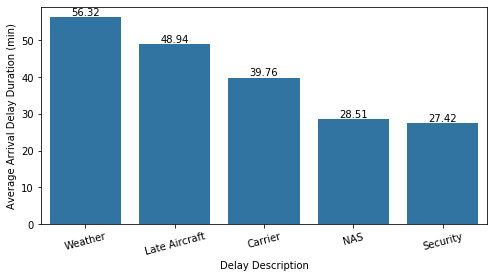

In [27]:
data = melt_delay.groupby(['delay_desc']).delay_dur.mean()
data = data.reset_index().sort_values('delay_dur', ascending=False)

plt.figure(figsize=[8, 4])
sb.barplot(data=data, x='delay_desc', y='delay_dur', color=base_color)
chart_means(data, 'delay_desc')
plt.xlabel('Delay Description')
plt.ylabel('Average Arrival Delay Duration (min)')
plt.xticks(rotation=15);

According to the Bureau of Transportation Statistics, a delayed flight due to Weather occurs when:
> _"(...) significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane._

Therefore it is expected that the longest average delay occurs due to weather - which in this dataset takes on average 56 minutes. These are harder to manage due to its uncontrollable nature. The second longest delay type is Late Aircraft, followed by Carrier, NAS and Security, which on average takes less than 30 minutes.

Which are the top 10 airports per average arrival delay?



Delayed flights from Hilton Head Island Airport (HHH): 5
Delayed flights in the State of Wyoming (WY): 89




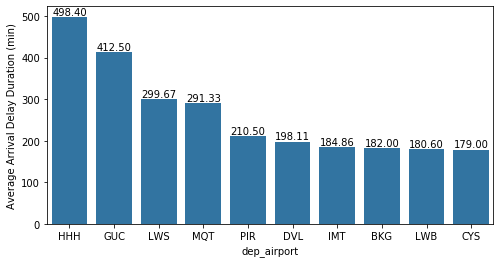

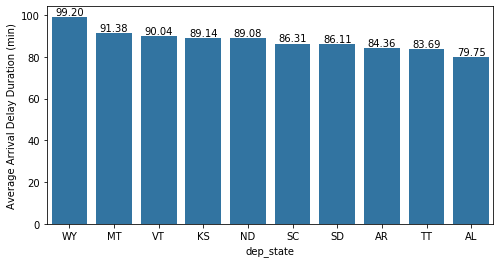

In [28]:
# Plot average arrival delay
variables = ['dep_airport', 'dep_state']

for variable in variables:
    data = df_delays.groupby([variable]).arr_delay.mean()
    data = data.reset_index().sort_values('arr_delay', ascending=False)[:10] # display top 10
    plt.figure(figsize=[8, 4])
    sb.barplot(data=data, x=variable, y='arr_delay', color=base_color)
    chart_means(data, variable)
    plt.xlabel(variable)
    plt.ylabel('Average Arrival Delay Duration (min)');
    
nb_airpt = len(df_delays.query('dep_airport == "HHH"'))
nb_state = len(df_delays.query('dep_state == "WY"'))

print('\n')
print('Delayed flights from Hilton Head Island Airport (HHH): {}'.format(nb_airpt))
print('Delayed flights in the State of Wyoming (WY): {}'.format(nb_state))
print('\n')

In [29]:
airport = df_delays.groupby('dep_airport').arr_delay.mean().sort_values(ascending=False)[:10].index

print('\n')
print(df_delays[['dep_airport', 'delay_severity', 'arr_delay']]
      .query('dep_airport in @airport').sort_values(['arr_delay', 'dep_airport'], ascending=False))
print('\n')



      dep_airport           delay_severity  arr_delay
13409         GUC  Severe (above 330 min.)     1283.0
34084         MQT  Severe (above 330 min.)     1232.0
20264         HHH  Severe (above 330 min.)     1183.0
43930         HHH  Severe (above 330 min.)     1157.0
51760         MQT  Severe (above 330 min.)     1007.0
60462         IMT  Severe (above 330 min.)      953.0
58988         DVL  Severe (above 330 min.)      927.0
29574         LWS  Severe (above 330 min.)      840.0
29844         MQT  Severe (above 330 min.)      571.0
22962         DVL  Severe (above 330 min.)      416.0
17466         LWB  Severe (above 330 min.)      332.0
67389         CYS    Long (151 - 330 min.)      320.0
5522          PIR    Long (151 - 330 min.)      270.0
84520         LWB    Long (151 - 330 min.)      264.0
2160          LWB    Long (151 - 330 min.)      233.0
78525         MQT    Long (151 - 330 min.)      201.0
59471         BKG    Long (151 - 330 min.)      182.0
9015          GUC    Long 

Because we have high outliers in the data, top ten aiports and states per average delay are those which had a few but long or severe delays.

In the Multivariate section, I will analyze airport's average delay per severity. Understanding this relationship will give us a better indication of departure airports that are most affected by each severity group.

For now, let's continue the analysis by exploring the relationship between arrival delay and distance.

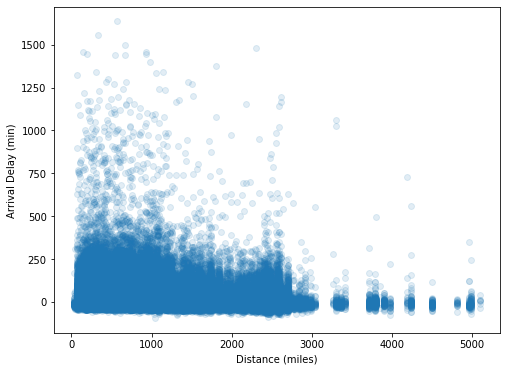

In [30]:
plt.figure(figsize=[8, 6])
sb.regplot(data=df_flights, x='distance', y='arr_delay', scatter_kws={'alpha': 1/8}, fit_reg=False)
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (min)');

The relationship between arrival delay and flight distance suggests that most delays occurs in domestic short distance flights. Outliers are also more present in shorter distance flights, most of them concentrating in the range of 0 to 1000 miles distance.

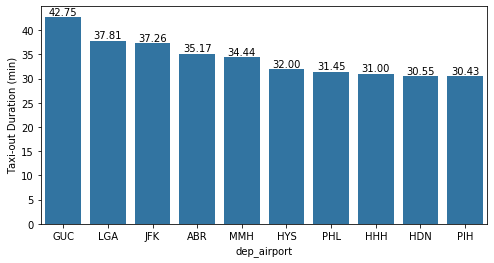

In [31]:
# Plot average taxi-out duration
data = df_delays.groupby(['dep_airport']).taxi_out.mean()
data = data.reset_index().sort_values('taxi_out', ascending=False)[:10] # display top 10

plt.figure(figsize=[8, 4])
sb.barplot(data=data, x='dep_airport', y='taxi_out', color=base_color)
chart_means(data, 'dep_airport')
plt.xlabel('dep_airport')
plt.ylabel('Taxi-out Duration (min)');

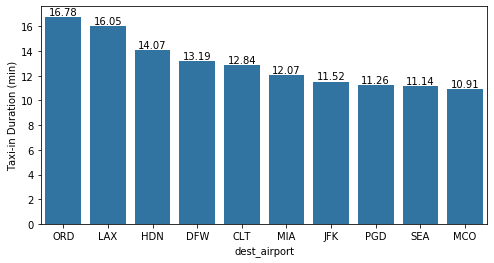

In [32]:
# Plot average taxi-in duration
data = df_delays.groupby(['dest_airport']).taxi_in.mean()
data = data.reset_index().sort_values('taxi_in', ascending=False)[:10] # display top 10

plt.figure(figsize=[8, 4])
sb.barplot(data=data, x='dest_airport', y='taxi_in', color=base_color)
chart_means(data, 'dest_airport')
plt.xlabel('dest_airport')
plt.ylabel('Taxi-in Duration (min)');

There is a significant difference between average taxiing times during departure and arrival. Looking only at the top 10 airports which has the highest average taxiing durations, departure flights takes approximately between 30 to 43 minutes on average, as opposed to  11 to 17 minutes at arrival. 

As observed previously, this trend suggests that airport operations tries to compensate delays by prioritizing delayed flights on gate assignment, and/or controlling taxiing speed. 

John F. Kennedy International Airport (JFK) and Yampa Valley Regional Airport (HDN) appears on both rankings

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As expected there is a strong correlation between departure delays and arrival delays. The same is observed in the relationship between distance and duration features. Aside from those, there is no significant correlations between the remaining variables. 

To have a better understanding of the data distribution, Data binning was used based on arrival delay duration. Delayed flights were classified according to 4 categories: Short Delay, Medium Delay, Long Delay and Severe Delay.

Short-delay flights are almost 3 times more frequent than medium-delay's. Furthermore, delays increased in severity on 2018 and 2019, following the same trend of flight demand during the 5-year period. Interestingly, the number of severe-delayed flights is increasing at a steady rate year after year.

June, July, August and December concentrate the majority of flight delays in each level, with a strong indication that holidays season is when flights are more prone to suffer all levels of delays. In contrast, number of delayed flights are lower during the months of September, October and November.

The longest average delay occurs due to weather - which in this dataset takes on average 56 minutes. Also, the top ten aiports and states per average delay are those which had a few but long or severe delays.

The relationship between arrival delay and flight distance suggests that most delays occurs in domestic short distance flights. Outliers are also more present in shorter distance flights.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Looking only at the top 10 airports with the highest average taxiing durations, we see a significant difference between average taxiing times during departure and arrival. This trend suggests that airport operations tries to compensate delays by prioritizing delayed flights on gate assignment, and/or controlling taxiing speed.

## Multivariate Exploration

This section will be dedicated to explore how year, month, hour of the day, departure airport and delay description relates with average arrival delays and average taxi-out duration.

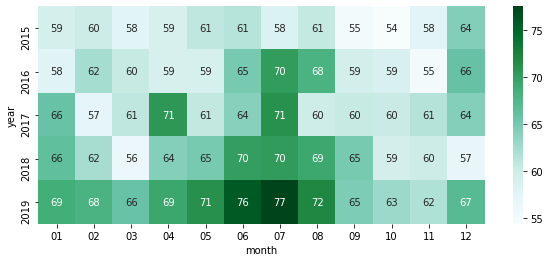

In [33]:
data = df_delays.groupby(['year', 'month']).arr_delay.mean()
data = data.reset_index(name='avg_delay')
data = data.pivot('year', 'month', 'avg_delay')

plt.figure(figsize=(10, 4))
sb.heatmap(data, cmap='BuGn', annot=True);

The average arrival delay varied between 55 and 77 minutes. In general, June, July, August, December and January are the months when average delay is higher. Again here a higher average delay is also observed in the years 2018 and 2019. 

Additionally, when comparing 2018 and 2019, average delay increased in all months, except for September, which remained the same: 65 minutes.

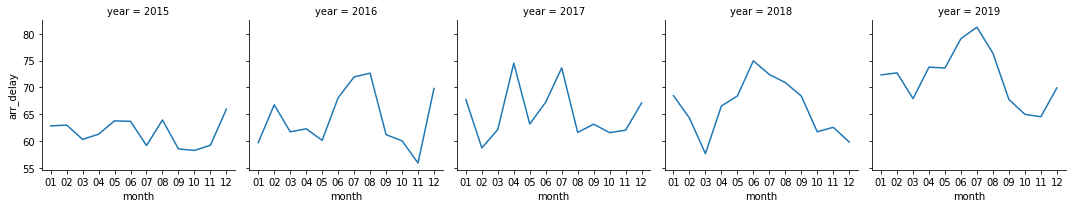

In [34]:
g = sb.FacetGrid(data=melt_delay, col='year')
g.map(sb.lineplot, 'month', 'arr_delay', ci=None);

Line charts are another way to depict the average arrival delay duration per month in each year. Here we also see that the average arrival delay increases every year. Through this visual, we have a better representation of the peaks in delays in each year. 

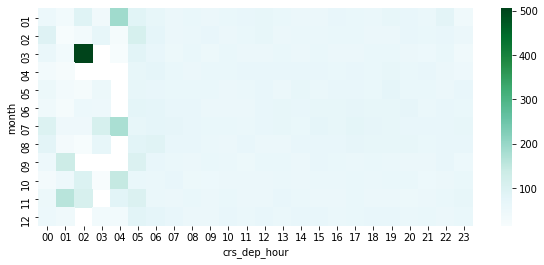

In [35]:
data = df_delays.groupby(['month', 'crs_dep_hour']).arr_delay.mean()
data = data.reset_index(name='avg_delay')
data = data.pivot('month', 'crs_dep_hour', 'avg_delay')

plt.figure(figsize=(10, 4))
sb.heatmap(data, cmap='BuGn', square=True);

The heatmap for average delays per hour against each month is inconclusive. Mainly due to a combination of two factors: low number of flights between 12am and 4am, and extremely long delays for flights with scheduled departure time between these hours.

Let's limit the data to show flight departing during commercial hours (i.e. from 6am to 10pm).

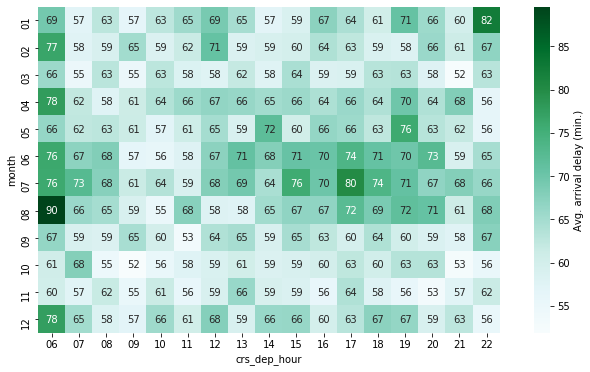

In [36]:
op_hours = np.arange(6, 23)
op_hours = [str(item).zfill(2) for item in op_hours]
data = df_delays.query('crs_dep_hour in @op_hours')

data = data.groupby(['month', 'crs_dep_hour']).arr_delay.mean()
data = data.reset_index(name='avg_delay')
data = data.pivot('month', 'crs_dep_hour', 'avg_delay')

plt.figure(figsize=(12, 6))
sb.heatmap(data, cmap='BuGn', square=True, annot=True,
           cbar_kws={'label': 'Avg. arrival delay (min.)'});

Flights scheduled to depart at 6am seems to have the highest average delay overall. During the months of June, July and August, flights with schedule departure times between 5pm and 8pm also had higher delays on average.



Count of flights per level of delay:
Short (15 - 60 min.)       62575
Medium (61 - 150 min.)     21443
Long (151 - 330 min.)       6227
Severe (above 330 min.)     1071
Name: delay_severity, dtype: int64




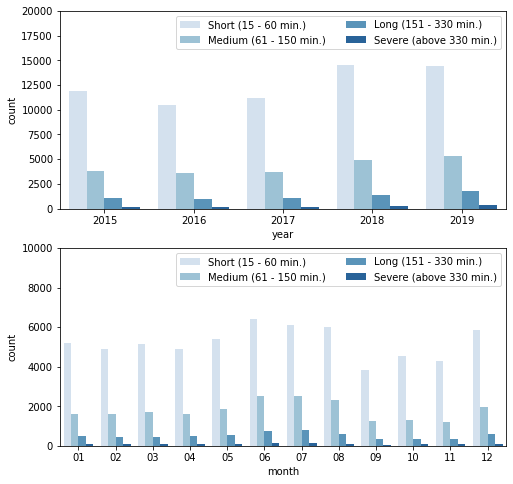

In [37]:
plt.figure(figsize = [8, 8])

# subplot 1: year vs delay severity
ax = plt.subplot(2, 1, 1)
sb.countplot(data = df_delays, x = 'year', hue = 'delay_severity', palette = 'Blues')
plt.ylim(0, 20000) 
ax.legend(ncol = 2)


# subplot 2: month vs delay severity
ax = plt.subplot(2, 1, 2)
sb.countplot(data = df_delays, x = 'month', hue = 'delay_severity', palette = 'Blues')
plt.ylim(0,10000) 
ax.legend(ncol = 2);

print('\n')
print('Count of flights per level of delay:')
print(df_delays.delay_severity.value_counts())
print('\n')

Long and severe delays account for only 8% of the delayed flights. Since these categories aggregate just a few flighs with extended delay duration, any calculation using average delay may not be representative of the whole dataset, as we will see below.

Delayed flights: 91316
Delayed flights (top 5 airports): 26


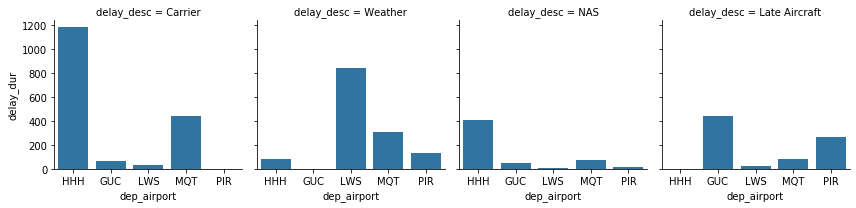

In [38]:
# Get top 5 airports with highest arrival delay average
top5_airpt = df_delays.groupby('dep_airport').arr_delay.mean()
top5_airpt = top5_airpt.reset_index().sort_values('arr_delay', ascending=False)
top5_airpt = top5_airpt.dep_airport[:5]

data = melt_delay.query('dep_airport in @top5_airpt')

# Generate plot
g = sb.FacetGrid(data = data, col = 'delay_desc')
g.map(sb.barplot, 'dep_airport', 'delay_dur', order=top5_airpt, ci=None);

top5_delay = len(df_delays.query('dep_airport in @top5_airpt'))
print('Delayed flights: {}'.format(len(df_delays)))
print('Delayed flights (top 5 airports): {}'.format(top5_delay))

The plot contains the top 5 airports per average arrival delay, each subplot categorized by delay description. 

The first aspect to be observed is the number of flights that fits this category: out of more than 90.000 delayed flights, the top 5 airports accounts for only 26 flights, indicating a number of outliers and a hight variability in delay duration. In the plot above the airport HHH had an average of nearly 1200 minutes delay attributed to Carrier.

Any analysis based on this data will not be representative of the whole dataset, therefore a few adjustments are needed in order to extract meaningful insights.

Since most of delays fall into Short and Medium severity, I'm interested in finding out which are the top 5 airports per fleet trafic that had up to 2h30 hours delay. 

In [39]:
# Filter delayed flights with Short and Medium delay severity
cat_severity = ['Short (15 - 60 min.)', 'Medium (61 - 150 min.)']
data = df_delays.query('delay_severity in @cat_severity')

In [40]:
# Top 5 airports with highest fleet traffic
top5_airpt = data.groupby('dep_airport').dep_airport.size()
top5_airpt = top5_airpt.reset_index(name='count').sort_values('count', ascending=False)
top5_airpt = top5_airpt.dep_airport.head()

data = data.query('dep_airport in @top5_airpt')

In [41]:
# Unpivot columns
value_vars = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']

id_vars = data.columns.difference(value_vars)
data_melt = pd.melt(data, id_vars=id_vars, value_vars=value_vars, 
               var_name='delay_desc', value_name='delay_dur')

index_names = data_melt[data_melt['delay_dur'] == 0].index
data_melt.drop(index_names, inplace=True)
data_melt.reset_index(drop=True, inplace=True)

Delayed flights: 91316
Delayed flights (top 5 airports): 19664


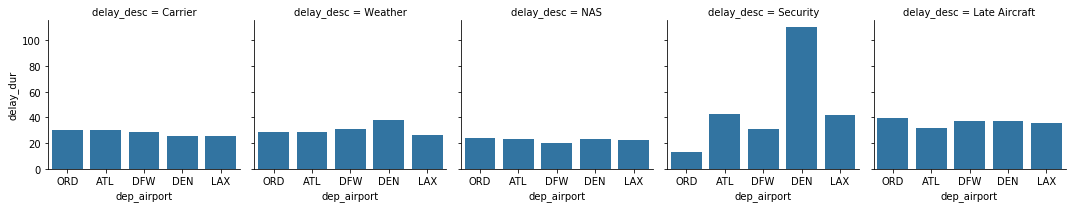

In [42]:
# Generate plot
g = sb.FacetGrid(data = data_melt, col = 'delay_desc', sharey=True)
g.map(sb.barplot, 'dep_airport', 'delay_dur', order=top5_airpt, ci=None);

print('Delayed flights: {}'.format(len(df_delays)))
print('Delayed flights (top 5 airports): {}'.format(len(data)))

In [43]:
(data[['dep_airport', 'date', 'arr_delay', 'Security']]
 .query('dep_airport == "DEN" & Security != 0'))

,dep_airport,date,arr_delay,Security
39913,DEN,2019-03-23,110.0,110.0


The 5 busiest airports in the United States registered delays in all categories. Except for Denver International Airport (DEN), which recorded only one flight delay due to Security reasons, the average delay varies between 20 and 40 minutes, with Late Aircraft having the highest delay, closer to 40 minutes on average for all 5 airports.

According to the definition, delays due to Late aircraft occur when a previous flight with same aircraft arrived late, causing the present flight to depart late. Due to the ripple effect in the subsequent stages of a flight, one can expect that cummulative delays are harder to compensate, thus the highest average.

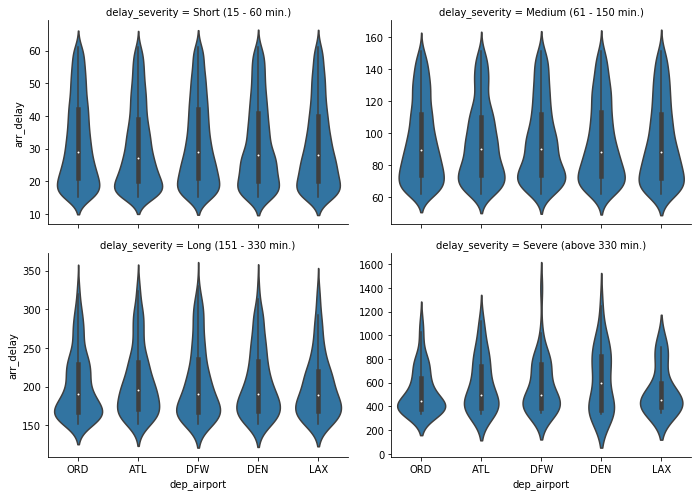

In [44]:
airpt_severity = df_delays.query('dep_airport in @top5_airpt & crs_dep_hour in @op_hours')

g = sb.FacetGrid(data=airpt_severity, col='delay_severity', sharey=False, col_wrap=2, height=3.5, aspect=1.4)
g.map(sb.violinplot, 'dep_airport', 'arr_delay', order=top5_airpt);

The faceted violin plot suggests similar distribution for the top 5 busiest airports. It seems that all level of delays are somewhat unimodal, having the bulk of the distribution at around the same value. Severe delayed flights is the exception: some bimofality is suggested in DEN, and a relatively high variance is observed in DFW.

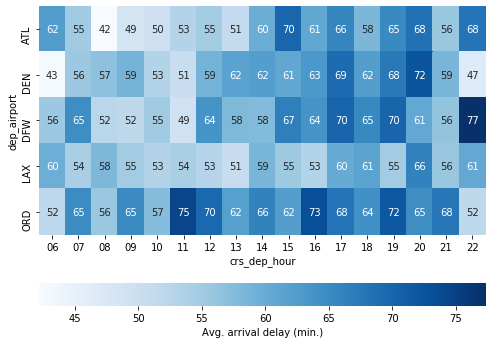

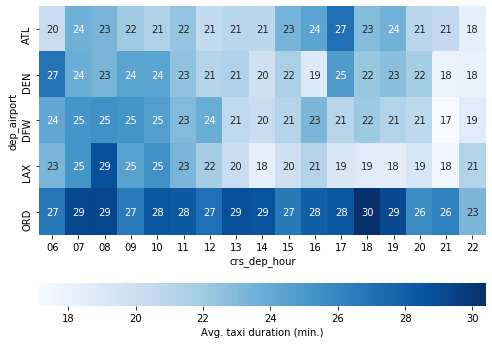

In [45]:
airpt_hour = airpt_severity.groupby(['dep_airport', 'crs_dep_hour']).arr_delay.mean()
airpt_hour = airpt_hour.reset_index(name='avg_delay')
airpt_hour = airpt_hour.pivot('dep_airport', 'crs_dep_hour', 'avg_delay')

plt.figure(figsize=(8, 6))
sb.heatmap(airpt_hour, cmap='Blues', annot=True,
           cbar_kws={'label': 'Avg. arrival delay (min.)', "orientation": "horizontal"});

fl_taxi = airpt_severity.groupby(['dep_airport', 'crs_dep_hour']).taxi_out.mean()
fl_taxi = fl_taxi.reset_index(name='avg_taxi')
fl_taxi = fl_taxi.pivot('dep_airport', 'crs_dep_hour', 'avg_taxi')

plt.figure(figsize=(8, 6))
sb.heatmap(fl_taxi, cmap='Blues', annot=True,
           cbar_kws={'label': 'Avg. taxi duration (min.)', "orientation": "horizontal"});

As the busiest from the 5 airports, ORD also had the highest average delay and average taxi-out duration throughout the entire operation period. Even though the window between 5 to 8pm registers the highest average delay overall, ATL, DEN and DFW had its peak on different hours of the day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I focused my investigation on delayed flights and explored the relationship between some of the features to understand which had the most effect of flight delays.  

The multivariate exploration emphasized that there was an increase in flight demand in the years 2018 and 2019. June, July and August were the months when flights were more prone to delays and which had the highest delay on average. Flights with schedule departure times between 5pm and 8pm also had higher delays on average, but in the dataset, this is initially hidden by the fact that a few severe delays were recorded between 12am and 4am. 


### Were there any interesting or surprising interactions between features?

Analysis including airports with very few flights with extreme delays skews the data, and does not make for a good representation of the whole dataset. When I focused on the top 5 busiest airports in the US, with flight delays up to 2h30min., I noticed that delays due to Late Aircraft last on average 40 minutes. ORD recorded the highest average delays and taxi-out times, and even though the window between 5 to 8pm registers the highest average delay overall, some of the 5 airports recorded its peak at differen times of the day.